In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [25]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

In [26]:
# Question: I thought that in unsupersed learning we didn't have an outcome variable?

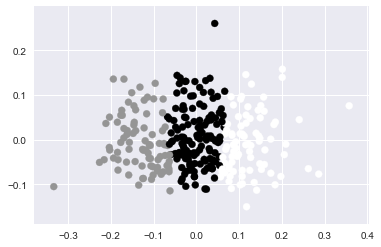

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      26  60
1      49  33
2      64  71


In [31]:
# Normalize the data.
# Question: What does "normalize" do?
X_norm = normalize(X)

# Reduce it to two components.
# Question: Can you refresh my memory on how PCA works?
X_pca = PCA(10).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [32]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=200)

minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0   0   1    2
row_0             
0       0  16  118
1      86   0   17
2       0  66    0


In [ ]:
# Questions:
# - How do you know how many "K" you should have? Are we looking for something in the scatterplot? (e.g. a specific shape)
# - Other than changing how many "Ks", what else can we do to tweak this algo? What if we did PCA with 6 features instead?
# - When looking at the crosstab comparison above, what am I looking for?